<a href="https://colab.research.google.com/github/KodaliSuchitraKamala/LASSO_And_Ridge_Regressions/blob/main/Program10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 2: Load California Housing Dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # Target is the median house value

In [ ]:
# Step 3: Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 5: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
print("📘 Ridge Regression:")
print("Coefficients:", ridge_model.coef_)
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))

📘 Ridge Regression:
Coefficients: [ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
 -0.89616759 -0.86907074]
MSE: 0.5558548589435971
R2 Score: 0.5758157428913684


In [ ]:
# Step 6: LASSO Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
print("\n📙 LASSO Regression:")
print("Coefficients:", lasso_model.coef_)
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))


📙 LASSO Regression:
Coefficients: [ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]
MSE: 0.6796290284328825
R2 Score: 0.48136113250290735


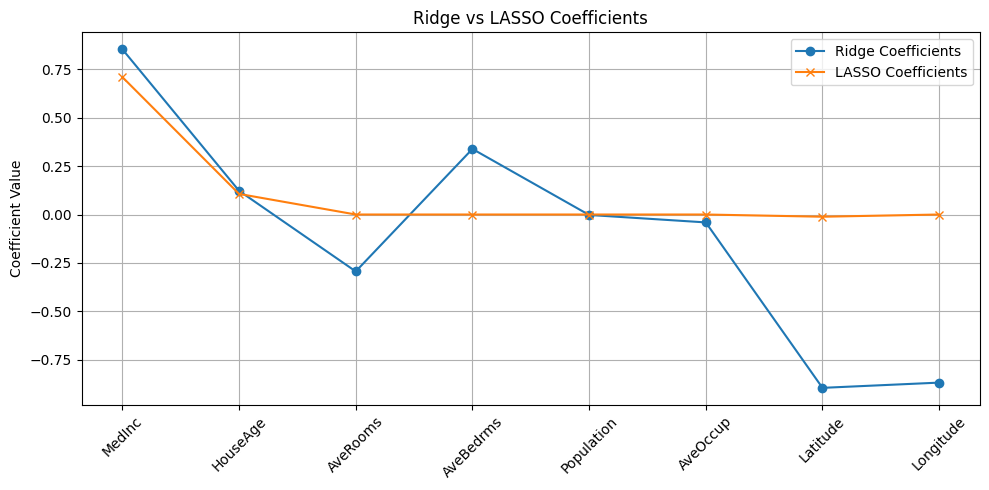

In [ ]:
# Step 7: Plot Coefficients
plt.figure(figsize=(10, 5))
plt.plot(ridge_model.coef_, label='Ridge Coefficients', marker='o')
plt.plot(lasso_model.coef_, label='LASSO Coefficients', marker='x')
plt.title('Ridge vs LASSO Coefficients')
plt.xticks(ticks=range(len(X.columns)), labels=X.columns, rotation=45)
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()